In [3]:
import numpy as np 
import datetime 
import os 
import glob
import sys
import time
from scipy.optimize import curve_fit
import seaborn as sns
import xarray as xr
import netCDF4 as nc
from tqdm import tqdm
import eurec4a
from intake import open_catalog
from scipy.stats import  linregress
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
import warnings
warnings.filterwarnings('ignore')



In [120]:

flights = [os.path.join(folder) for folder in os.scandir('/projekt_agmwend/data/HALO-AC3/02_Flights/') if 'HALO' in str(folder)[-20:]]

In [100]:
params_name = []

for flight in flights:
    nc_file = glob.glob(flight + '/BAHAMAS/*_v1.nc')
    if len(nc_file) == 0:
        print(flight)
    else:
        params_name.append(nc_file[0])

#params_name = [glob.glob(flight + '/BAHAMAS/*_v1.nc') for flight in flights]

/projekt_agmwend/data/HALO-AC3/02_Flights/HALO-AC3_20220225_HALO_RF00
/projekt_agmwend/data/HALO-AC3/02_Flights/HALO-AC3_20220414_HALO_RF19
/projekt_agmwend/data/HALO-AC3/02_Flights/HALO-AC3_20220221_HALO_EMV


In [101]:

    print(xrHALO.lat.min().values, xrHALO.lat.max().values, xrHALO.lon.min().values, xrHALO.lon.max().values)

67.63114899188636 79.73095873237394 -9.266500909183376 20.400625812748675
67.6046267109 88.7548778291 -37.951352866 20.518048323899997
67.60914277998661 87.01241182275785 -55.326317747237404 20.438193219747376
67.60707816945349 87.74783827641508 -5.24734513893786 20.504278574874373
67.62421838377267 85.0737280850162 8.405871900497921 25.000371473589546
67.82463147818638 79.68356308330401 -9.77971397007542 22.751098243074786
67.74739197797037 77.14998366079625 -18.002903293577134 20.57232953438546
67.70056252572606 87.7882164068281 -11.831639572056188 24.463906850249497
67.8257030228423 89.31589826824671 -35.01363206168689 20.562829740981684
67.7535584427646 81.30727637138546 -4.812958054113104 20.667734228700656
67.61805553983844 81.49909887208281 -7.088271499360324 25.001468244645128
67.78163789502602 89.45916491700731 -55.86103058604205 28.060663933514913
67.82471874793579 83.95108344173356 -10.468699031558945 20.574487306914648
67.76428519715003 84.88410579355917 -11.118269678113247

(48, 90, -56, 30)

In [53]:
params_name = params_name[0]
xrparams = xr.open_dataset(params_name)

xrHALO = xr.Dataset(
    data_vars=dict(
        lat=(["time"], xrparams['IRS_LAT'].values),
        lon=(["time"], xrparams['IRS_LON'].values),
        alt=(["time"], xrparams['IRS_ALT'].values),
        roll=(["time"], xrparams['IRS_PHI'].values),
        pitch=(["time"], xrparams['IRS_THE'].values),
        hdg=(["time"], xrparams['IRS_HDG'].values),
        gs=(["time"], xrparams['IRS_GS'].values),

    ),
    coords=dict(

        time=xrparams['TIME'].values,
    ),
)



'2022-03-28'

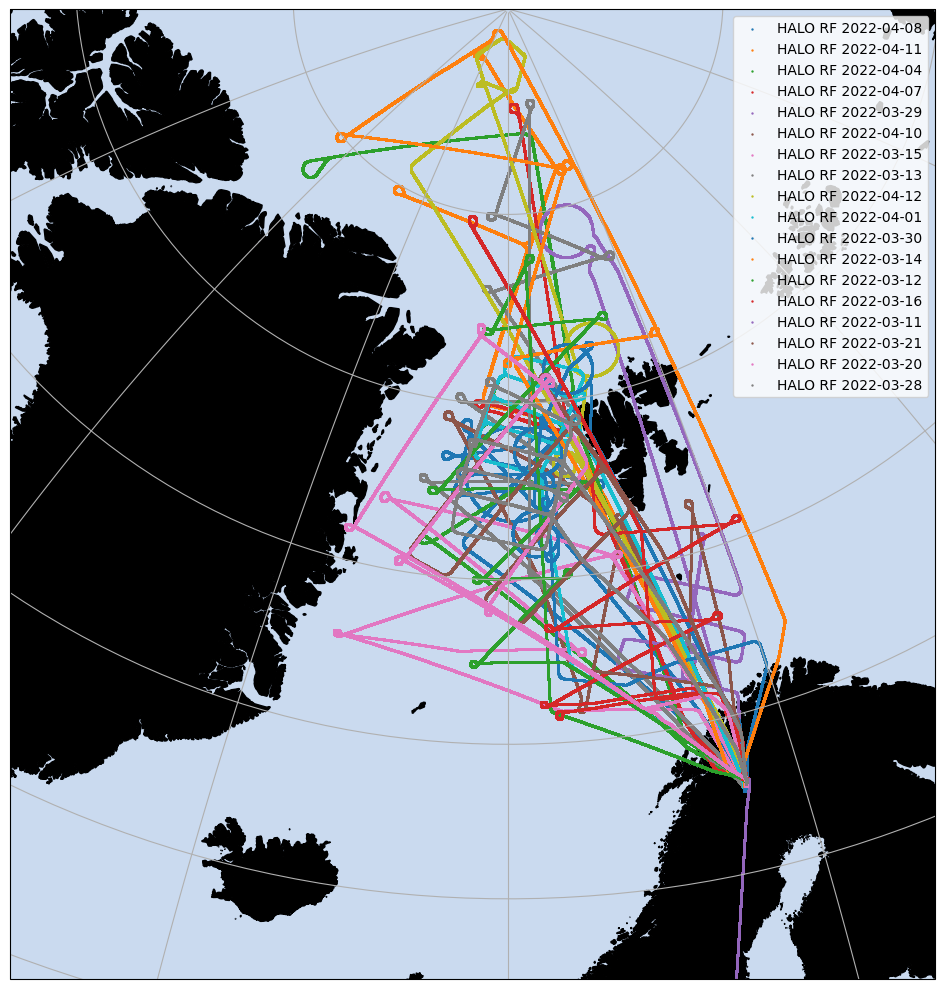

In [122]:
extent = [xrHALO.lon.min()-1, xrHALO.lon.max()+1, xrHALO.lat.min()-1, xrHALO.lat.max()+1]
extent = [ -35, 30, 60, 90,]
fig = plt.figure(figsize=(10, 10), tight_layout=True)
#spec = fig.add_gridspec(4, 4, width_ratios=[1, 1, 1, .5])
ax0 = fig.add_subplot(projection=crs.Stereographic())
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='black', linewidth=1,
                                        facecolor='k')

ocean_10m = cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'], alpha = .5)
ax0.add_feature(ocean_10m)
ax0.add_feature(land_10m)



#axt = fig.add_subplot(spec[0, :3])
#axt.set_axis_off()
#axt.text(0.5, 0.5, f"{f_format} : Circle {circle}", fontsize=32)

#end of current viewing slice is depicted position
for param in params_name:
    xrparams = xr.open_dataset(param)

    xrHALO = xr.Dataset(
        data_vars=dict(
            lat=(["time"], xrparams['IRS_LAT'].values),
            lon=(["time"], xrparams['IRS_LON'].values),
            alt=(["time"], xrparams['IRS_ALT'].values),
            roll=(["time"], xrparams['IRS_PHI'].values),
            pitch=(["time"], xrparams['IRS_THE'].values),
            hdg=(["time"], xrparams['IRS_HDG'].values),
            gs=(["time"], xrparams['IRS_GS'].values),

        ),
        coords=dict(

            time=xrparams['TIME'].values,
        ),
    )

    date_str = str(xrHALO.time.values[0]).split('T')[0]
    lats = xrHALO.lat.values 
    lons = xrHALO.lon.values
    ax0.scatter(lons, lats, transform=crs.PlateCarree(), s=.5, label = f'HALO RF {date_str}')



#ax0.scatter(lons[-10:], lats[-10:], transform=crs.PlateCarree(), s=10, color='red')
ax0.set_extent(extent)
#ax0.scatter(-59.543, 13.193, c='k', label='Barbados')
#ax0.legend(loc='upper right')

gl = ax0.gridlines(draw_labels=False, dms=False, x_inline=False, y_inline=False)








lon = abs(lons[-1])

text = AnchoredText(f'HALO @ {lats[-1]:.2f}°N {lon:.2f}°W',
                loc=4, prop={'size': 12}, frameon=True)
#ax0.add_artist(text)

gl.xlabel_style = {'size': 18}
gl.ylabel_style = {'size': 18}


ax0.legend()

gl.ylabels_right = False
gl.xlabels_bottom = False